# Example notebook to work with fastai v2 (still in beta)

In [13]:
from fastai2.tabular.all import *

In [3]:
path = untar_data(URLs.ADULT_SAMPLE)
path.ls()

(#3) [Path('/home/ruben/.fastai/data/adult_sample/models'),Path('/home/ruben/.fastai/data/adult_sample/export.pkl'),Path('/home/ruben/.fastai/data/adult_sample/adult.csv')]

In [4]:
df = pd.read_csv(path/'adult.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,49,Private,101320,Assoc-acdm,12.0,Married-civ-spouse,NaN,Wife,White,Female,0,1902,40,United-States,>=50k
1,44,Private,236746,Masters,14.0,Divorced,Exec-managerial,Not-in-family,White,Male,10520,0,45,United-States,>=50k
2,38,Private,96185,HS-grad,NaN,Divorced,NaN,Unmarried,Black,Female,0,0,32,United-States,<50k
3,38,Self-emp-inc,112847,Prof-school,15.0,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,United-States,>=50k
4,42,Self-emp-not-inc,82297,7th-8th,NaN,Married-civ-spouse,Other-service,Wife,Black,Female,0,0,50,United-States,<50k


In [5]:
dls = TabularDataLoaders.from_csv(path/'adult.csv', path=path, y_names="salary",
    cat_names = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race'],
    cont_names = ['age', 'fnlwgt', 'education-num'],
    procs = [Categorify, FillMissing, Normalize])

In [6]:
dls.show_batch()

,workclass,education,marital-status,occupation,relationship,race,education-num_na,age,fnlwgt,education-num,salary
0,Self-emp-not-inc,Some-college,Married-civ-spouse,Exec-managerial,Other-relative,White,False,29.000000,104422.998446,10.0,>=50k
1,Private,Assoc-voc,Never-married,Craft-repair,Not-in-family,White,False,37.000000,183345.000323,11.0,<50k
2,Private,Some-college,Married-civ-spouse,Exec-managerial,Husband,White,False,36.000000,188068.999929,10.0,>=50k
3,Local-gov,Some-college,Married-civ-spouse,Craft-repair,Husband,White,False,34.000000,325791.999638,10.0,<50k
4,Private,HS-grad,Divorced,Other-service,Not-in-family,White,False,70.000001,184175.999983,9.0,<50k
5,Private,11th,Never-married,Sales,Own-child,White,False,17.000001,110797.998700,7.0,<50k
6,Federal-gov,Masters,Married-civ-spouse,Exec-managerial,Husband,White,False,55.000000,35723.002866,14.0,>=50k
7,Federal-gov,Some-college,Divorced,Farming-fishing,Not-in-family,White,False,52.999999,227836.000191,10.0,<50k
8,Private,Assoc-voc,Married-civ-spouse,Craft-repair,Husband,White,False,47.000000,431515.006805,11.0,>=50k
9,Private,HS-grad,Married-civ-spouse,Tech-support,Husband,White,False,25.000000,274227.999123,9.0,<50k


In [7]:
import inspect

In [30]:
from fastai2.callback.core import Callback
inspect.signature(Callback.__init__)


<Signature (self, /, *args, **kwargs)>

In [32]:
_cb = Callback(4)

learn = tabular_learner(dls, metrics=accuracy, cbs=_cb)
_cb('begin_fit')

TypeError: Callback() takes no arguments

In [48]:
learn = tabular_learner(dls, metrics=accuracy)

In [49]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,accuracy,time
0,0.356757,0.353402,0.838913,00:02


In [8]:
learn.show_results()

,workclass,education,marital-status,occupation,relationship,race,education-num_na,age,fnlwgt,education-num,salary,salary_pred
0,5.0,16.0,5.0,13.0,2.0,5.0,1.0,-0.702106,-0.643422,-0.027606,0.0,0.0
1,5.0,12.0,5.0,8.0,2.0,5.0,1.0,-0.848914,0.613574,-0.419276,0.0,0.0
2,5.0,16.0,1.0,14.0,2.0,5.0,1.0,-0.702106,-0.227409,-0.027606,0.0,0.0
3,7.0,13.0,3.0,4.0,1.0,5.0,1.0,-0.702106,-1.064921,1.539074,0.0,0.0
4,5.0,10.0,3.0,13.0,1.0,5.0,1.0,0.252148,0.211883,1.147404,1.0,1.0
5,5.0,9.0,2.0,6.0,1.0,5.0,1.0,-0.702106,0.320352,0.364064,1.0,0.0
6,5.0,16.0,5.0,5.0,2.0,5.0,1.0,0.986189,1.311330,-0.027606,0.0,0.0
7,5.0,16.0,3.0,2.0,1.0,5.0,1.0,-0.995722,-0.682690,-0.027606,0.0,0.0
8,5.0,12.0,5.0,8.0,2.0,5.0,1.0,-0.188277,-0.374788,-0.419276,0.0,0.0


In [9]:
test_df = df.copy()[:5]
test_df.drop(['salary'], axis=1, inplace=True)
dl = learn.dls.test_dl(test_df)
test_df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,49,Private,101320,Assoc-acdm,12.0,Married-civ-spouse,NaN,Wife,White,Female,0,1902,40,United-States
1,44,Private,236746,Masters,14.0,Divorced,Exec-managerial,Not-in-family,White,Male,10520,0,45,United-States
2,38,Private,96185,HS-grad,NaN,Divorced,NaN,Unmarried,Black,Female,0,0,32,United-States
3,38,Self-emp-inc,112847,Prof-school,15.0,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,United-States
4,42,Self-emp-not-inc,82297,7th-8th,NaN,Married-civ-spouse,Other-service,Wife,Black,Female,0,0,50,United-States


In [10]:
inputs, preds, targets, decoded = learn.get_preds(dl=dl, with_input=True, with_decoded=True, with_loss=False)
# learn.dls.vocab[1]
inputs, preds, targets, decoded

((tensor([[ 5,  8,  3,  0,  6,  5,  1],
          [ 5, 13,  1,  5,  2,  5,  1],
          [ 5, 12,  1,  0,  5,  3,  2],
          [ 6, 15,  3, 11,  1,  2,  1],
          [ 7,  6,  3,  9,  6,  3,  2]]),
  tensor([[ 0.7660, -0.8380,  0.7557],
          [ 0.3990,  0.4363,  1.5391],
          [-0.0415, -0.8863, -0.0276],
          [-0.0415, -0.7296,  1.9307],
          [ 0.2521, -1.0170, -0.0276]])),
 tensor([[0.5099, 0.4901],
         [0.2615, 0.7385],
         [0.9936, 0.0064],
         [0.1214, 0.8786],
         [0.8110, 0.1890]]),
 None,
 tensor([0, 1, 0, 1, 0]))

In [11]:
test_df['salary_pred'] = learn.dls.vocab[decoded]
test_df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary_pred
0,49,Private,101320,Assoc-acdm,12.0,Married-civ-spouse,NaN,Wife,White,Female,0,1902,40,United-States,<50k
1,44,Private,236746,Masters,14.0,Divorced,Exec-managerial,Not-in-family,White,Male,10520,0,45,United-States,>=50k
2,38,Private,96185,HS-grad,NaN,Divorced,NaN,Unmarried,Black,Female,0,0,32,United-States,<50k
3,38,Self-emp-inc,112847,Prof-school,15.0,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,United-States,>=50k
4,42,Self-emp-not-inc,82297,7th-8th,NaN,Married-civ-spouse,Other-service,Wife,Black,Female,0,0,50,United-States,<50k


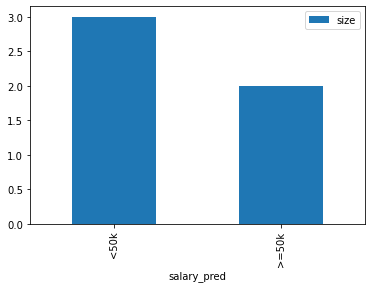

In [12]:
test_df.groupby('salary_pred', as_index=False).size().plot.bar(x='salary_pred')